# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

!pip install numpy pandas matplotlib seaborn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
#import csv
#file = open('foodhub_order.csv')


Mounted at /content/drive


In [ ]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')



In [ ]:
# Write your code here to view the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print(f"Total number of rows {df.shape[0]}")
print(f"Total number of columns {df.shape[1]}")

Total number of rows 1898
Total number of columns 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes =='object']

# print(f"Columns not an object: \t {num_vars}")
# print(f"Columns which are object: \t {cat_vars}")
print(df.isnull().sum().sort_values(ascending=True)/len(df))
print(f"Length of data frame:  {len(df)}")



order_id                 0.0
customer_id              0.0
restaurant_name          0.0
cuisine_type             0.0
cost_of_the_order        0.0
day_of_the_week          0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64
Length of data frame:  1898


#### Observations:
No missing values in the data frame


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

Minimum value computed: 15
Mean value computed: 24.161749209694417
Maximum value computed: 33


<Axes: >

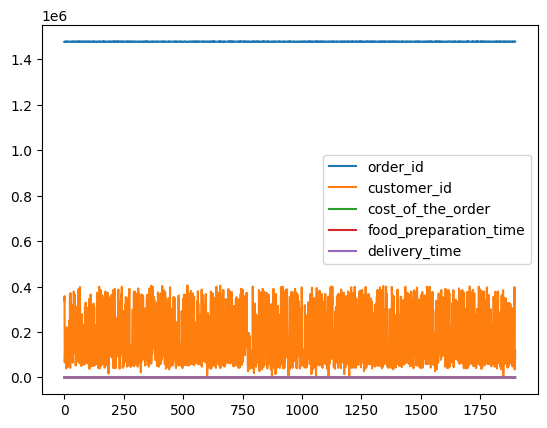

In [ ]:
print(f"Minimum value computed: {df['delivery_time'].min()}")
print(f"Mean value computed: {df['delivery_time'].mean()}")
print(f"Maximum value computed: {df['delivery_time'].max()}")
df.plot()


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df[df["rating"] == "Not given"]
print((df["rating"] == "Not given").sum())


736


#### Observations:
Total number of not rated orders is 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

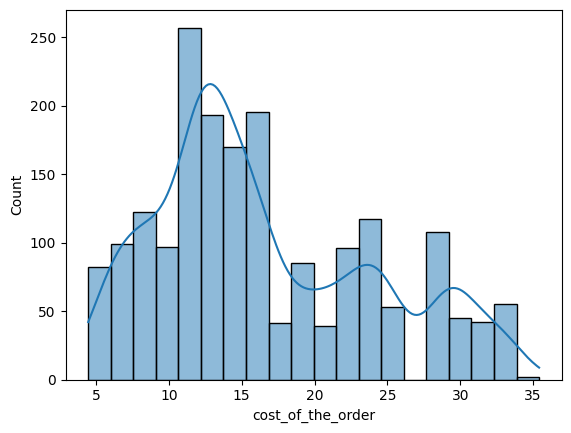

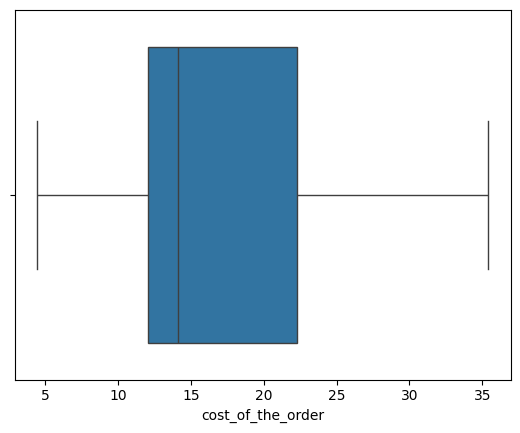

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
sns.histplot(df['cost_of_the_order'], bins =20, stat = 'count', kde=True)
plt.show()

sns.boxplot(x=df['cost_of_the_order'])
plt.show()

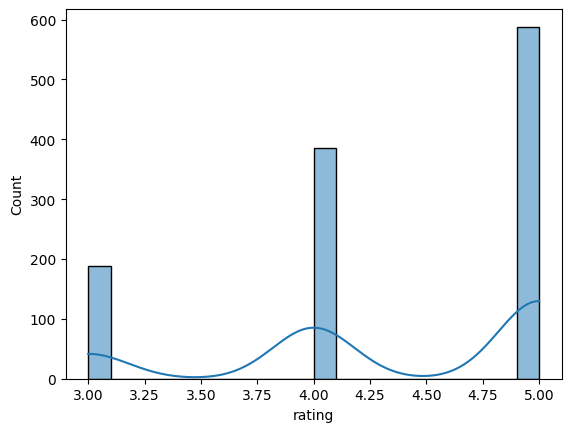

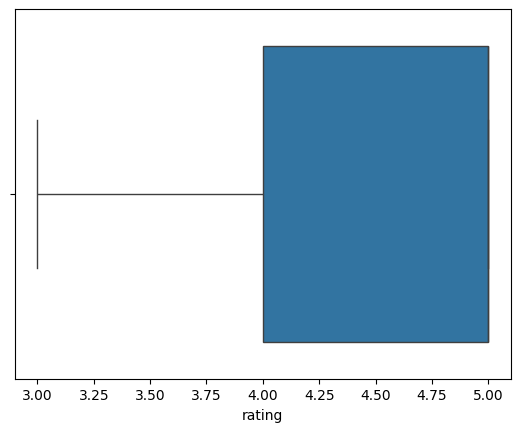

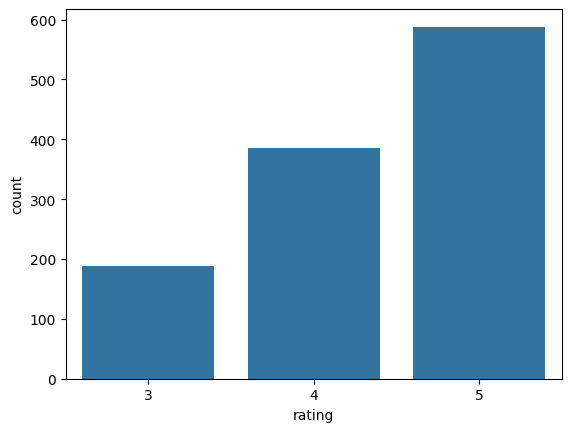

In [ ]:
#For rating we eliminate the not given values
df_rated = df[df['rating'] != 'Not given'].copy()
df_rated['rating'] = df_rated['rating'].astype('int')
df_rated
sns.histplot(df_rated['rating'], bins =20, stat = 'count', kde=True)
plt.show()

sns.boxplot(x=df_rated['rating'])
plt.show()
sns.countplot(x=df_rated['rating'])
plt.show()


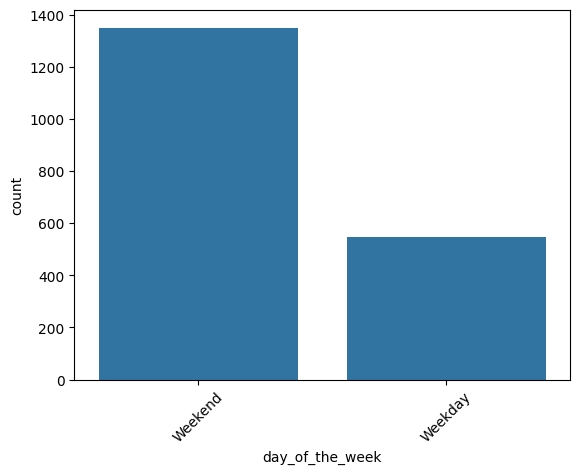

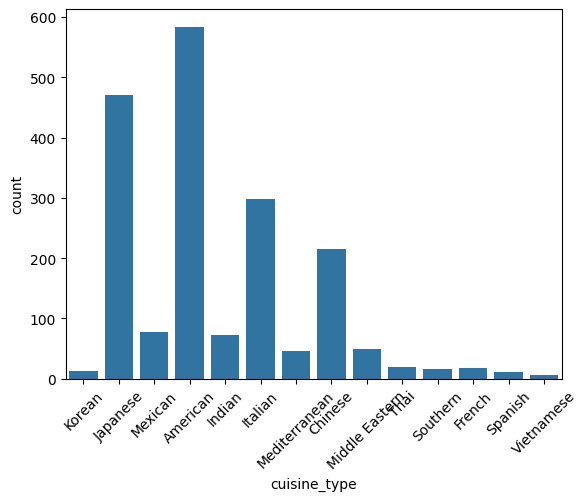

In [ ]:
sns.countplot(x=df['day_of_the_week'])
plt.xticks(rotation=45)
plt.show()
sns.countplot(x=df['cuisine_type'])
plt.xticks(rotation=45)
plt.show()


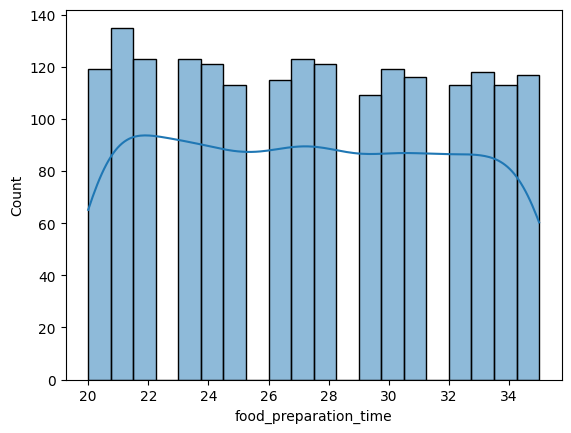

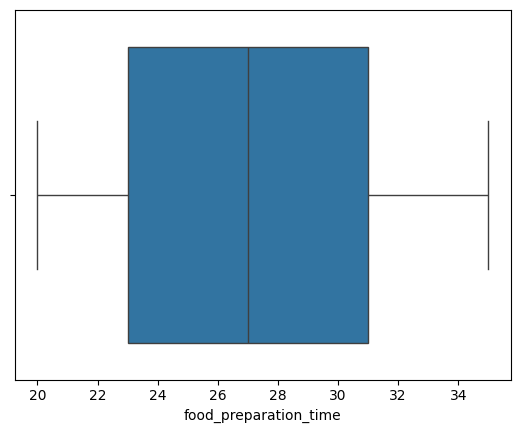

In [ ]:
sns.histplot(df['food_preparation_time'], bins =20, stat = 'count', kde=True)
plt.show()

sns.boxplot(x=df['food_preparation_time'])
plt.show()


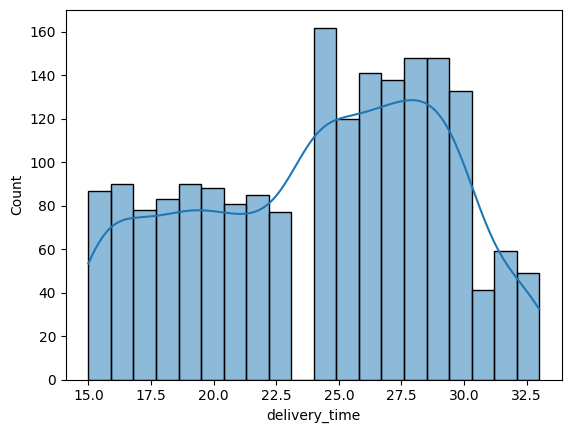

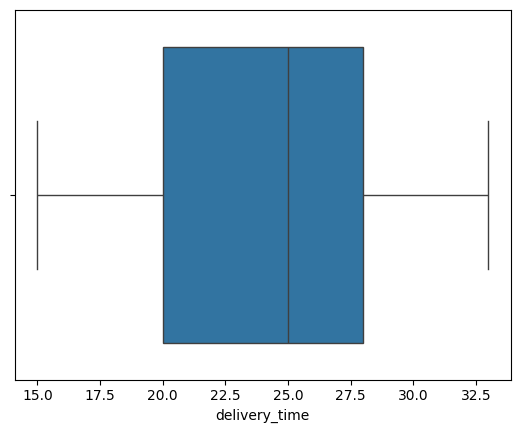

In [ ]:
sns.histplot(df['delivery_time'], bins =20, stat = 'count', kde=True)
plt.show()

sns.boxplot(x=df['delivery_time'])
plt.show()

# Observations:
The histplot exhibits a leftward skew, with lower costs being more prevalent and a peak emerging at $25.

The boxplot reveals a median cost of approximately $14, with a right-skewed distribution of orders, suggesting a broader range of values above the median.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts().nlargest(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


##Observations: The top-five restaurants by number of orders are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

In [ ]:
dfrestaurant = df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).reset_index()
print(dfrestaurant.head(5))

             restaurant_name  cost_of_the_order
0                Shake Shack            3579.53
1          The Meatball Shop            2145.21
2          Blue Ribbon Sushi            1903.95
3  Blue Ribbon Fried Chicken            1662.29
4                       Parm            1112.76


#### Observations:
1.   The restaurant name called Shake shack produced 219 orders which costs $3579.53.

2.   The last one of the top most restaurant is Parm, which created 68 orders with the profit of $1112.76.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

Cuisine type most popular in weekend cuisine_type
American    415
Name: count, dtype: int64
Cusine type using mode 0    American
Name: cuisine_type, dtype: object


<ipython-input-19-283cd8a2a960>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


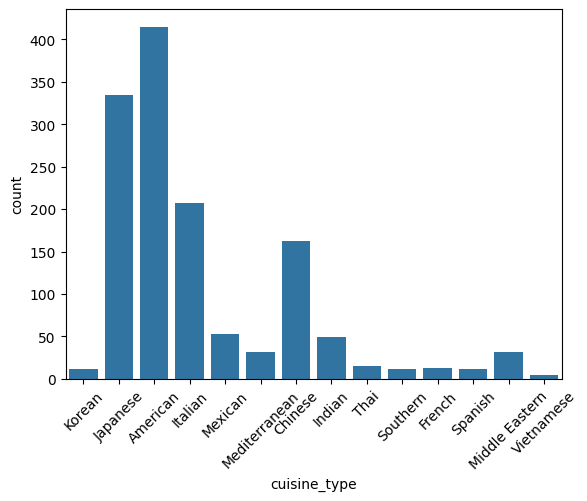

In [ ]:
tf = df[df['day_of_the_week'] == 'Weekend']
print(f"Cuisine type most popular in weekend {tf['cuisine_type'].value_counts().head(1)}")
print(f"Cusine type using mode {tf['cuisine_type'].mode()}")
ax = sns.countplot(x='cuisine_type', data=tf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

#### Observations:The most popular cuisine on weekends is American cuisine, which has 415 counts compares to other 14 cuisines. The second one is Japanese cuisine(335 counts). The third one is Italian(207).


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
mf = df['cost_of_the_order'].sum()
rf = df[df['cost_of_the_order'] > 20]
print(f"Percentage of order cost more than 20$: {rf['cost_of_the_order'].count() *100/df['cost_of_the_order'].count()}")


Percentage of order cost more than 20$: 29.24130663856691


#### Observations:Percentage of order cost more than 20$: 29.24130663856691


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
print(df['delivery_time'].mean())

24.161749209694417


#### Observations: The mean order delivery time is 24.16.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:The customer order such as 52832,47440,83287 are the top 3 most frequent customers eligible for 20% discount vouchers based on the orders they placed per data frame.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


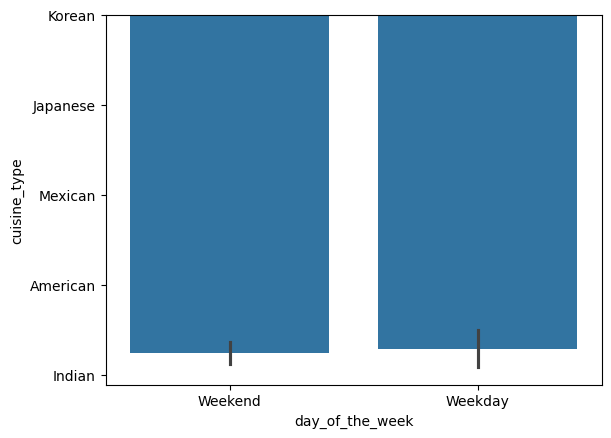

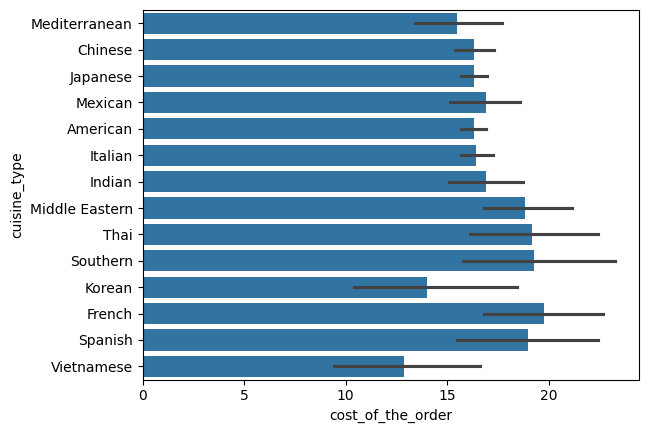

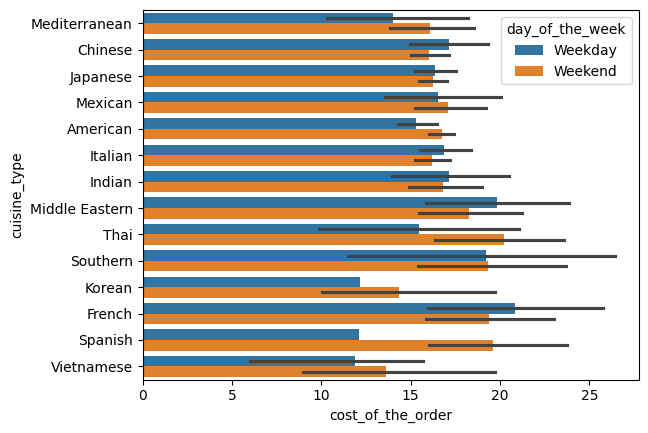

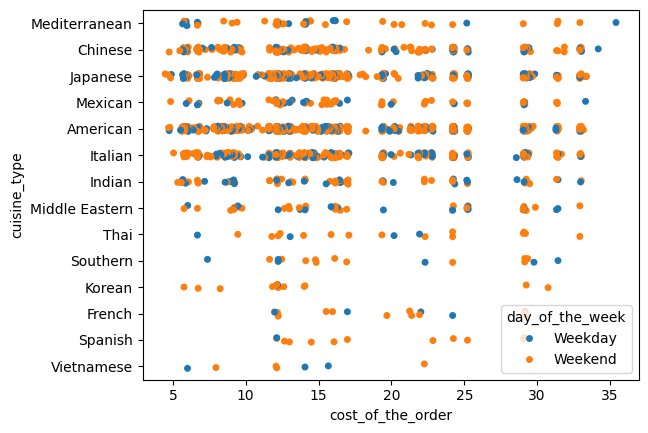

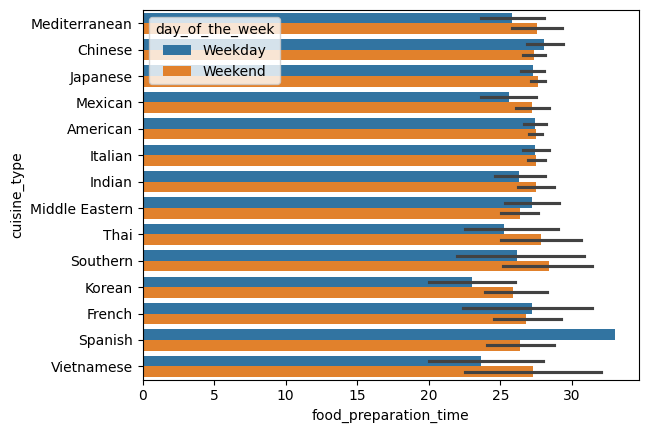

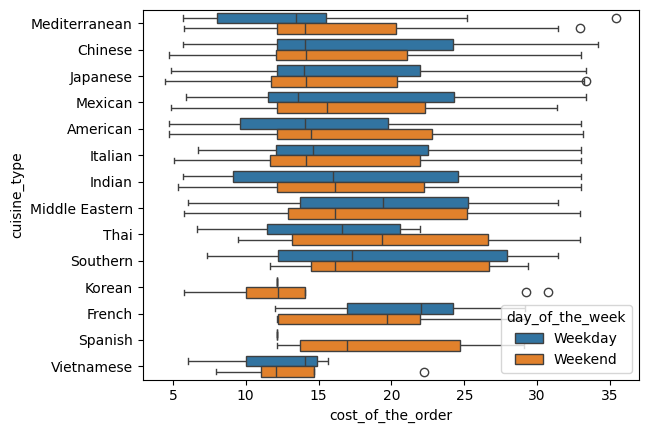

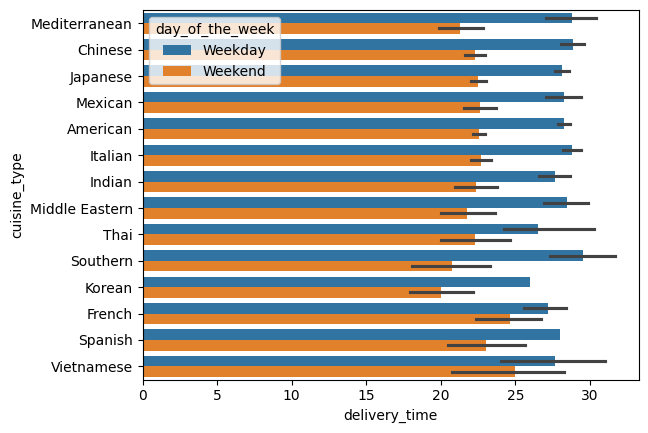

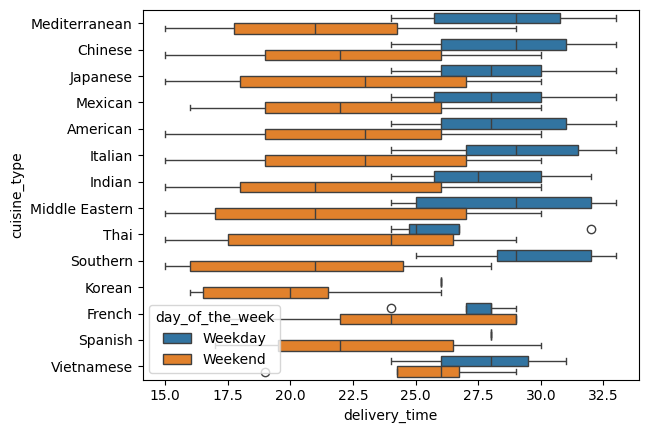

In [ ]:
sns.barplot(x = df['day_of_the_week'],y= df['cuisine_type'], data=df)
plt.show()

cos_sort = df.sort_values('cost_of_the_order', ascending = False, inplace = True)
#cos_sort = df.sort_values('cost_of_the_order', ascending = False, inplace = True)

sns.barplot(x = df['cost_of_the_order'],y= df['cuisine_type'], data=df)
plt.show()

sns.barplot(x = df['cost_of_the_order'],y= df['cuisine_type'], hue=df['day_of_the_week'])
plt.show()

sns.stripplot(x = df['cost_of_the_order'],y= df['cuisine_type'], hue=df['day_of_the_week'])
plt.show()

sns.barplot(x = df['food_preparation_time'],y= df['cuisine_type'], hue=df['day_of_the_week'])
plt.show()


sns.boxplot(x = df['cost_of_the_order'],y= df['cuisine_type'], hue=df['day_of_the_week'])
plt.show()

sns.barplot(x = df['delivery_time'],y= df['cuisine_type'], hue=df['day_of_the_week'])
plt.show()

sns.boxplot(x = df['delivery_time'],y= df['cuisine_type'], hue=df['day_of_the_week'])
plt.show()





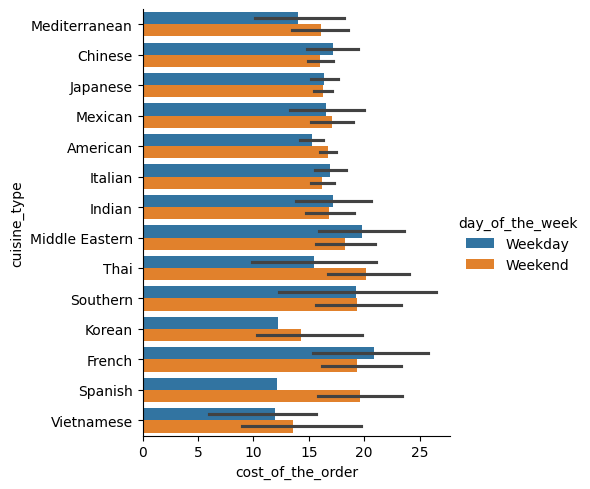

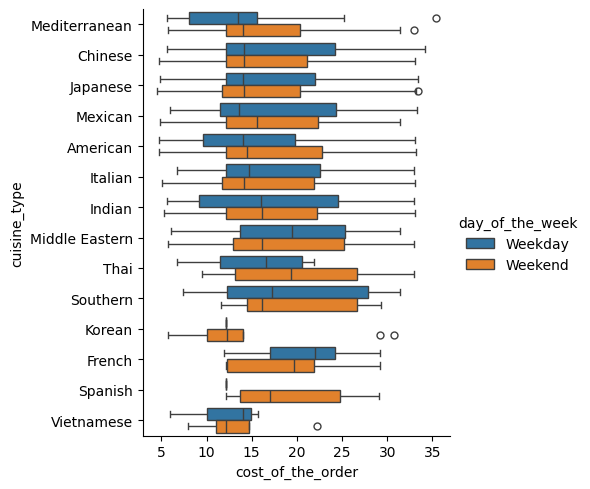

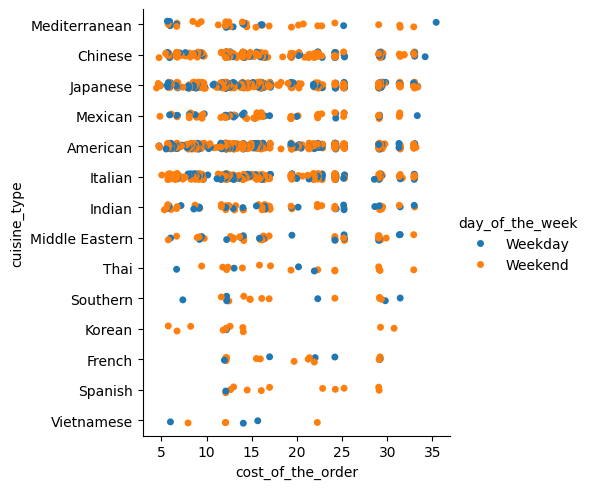

In [ ]:
sns.catplot(x = df['cost_of_the_order'],y= df['cuisine_type'], hue=df['day_of_the_week'], kind = 'bar')
plt.show()

sns.catplot(x = df['cost_of_the_order'],y= df['cuisine_type'], hue=df['day_of_the_week'], kind = 'box')
plt.show()

sns.catplot(x = df['cost_of_the_order'],y= df['cuisine_type'], hue=df['day_of_the_week'], kind = 'strip')
plt.show()



##Observations: A multivariate analysis of the dataset shows no significant correlations between any of the available variables per study the graph.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Read the data
#df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

#replaces all zero ratings as naans
df_rated['rating'].replace(0, np.nan, inplace=True)

# Drop rows with missing values in the rating column
df_rated.dropna(subset=['rating'], inplace=True)

# Convert rating column from float to integer
df_rated['rating'] = df_rated['rating'].astype('int')



# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()
new_rating_count = df_rating_count[df_rating_count['rating'] > 50]
new_rating_count.head()

# Create a dataframe that contains the resturants that have average rating should be greater than 4
df_rating_avg = df_rated.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()
df_rating_avg.head()
new_rating_avg = df_rating_avg[df_rating_avg['rating'] > 4]
new_rating_avg.head()

#Find the restaurants fulfilling the criteria to get the promotional offer.
new_rating_count.merge(new_rating_avg, on = 'restaurant_name')











,restaurant_name,rating_x,rating_y
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


##Observations: There are only 4 restaurants have 50 or more orders with ratings which is greated than 4 to qualify for the pronotional offer such as Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def calculate_revenue(cost):
   if cost > 20:
         return cost * 0.25
   elif cost > 5:
         return cost * 0.15
   else:
         return 0

# Calculate the commission and net revenue for each order

df['commission'] = df['cost_of_the_order'].apply(calculate_revenue)
df.head()

tot_comm = df['commission'].sum()
print(f"Total commission generated by the company: {tot_comm}")




Total commission generated by the company: 6166.303000000001


#### Observations:Total commission generated by the company: 6166.303.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['analysis_prep_time'] = df['food_preparation_time'] + df['delivery_time']
order_values = df['analysis_prep_time'][df['analysis_prep_time'] > 60].count()

print((order_values/df['cost_of_the_order'].count())*100)

10.537407797681771


#### Observations:The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.5%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
#df('delivery_time').mean()
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


In [ ]:
#returns the difference between average weekeday delivery times and average weekend delivery times
df.groupby('day_of_the_week')['delivery_time'].mean().diff()


,delivery_time
day_of_the_week,
Weekday,NaN
Weekend,-5.870014


In [ ]:
#returns the percent difference between the average weekend delivery time from the weekday average
df.groupby('day_of_the_week')['delivery_time'].mean().diff() / df.groupby('day_of_the_week')['delivery_time'].mean()


,delivery_time
day_of_the_week,
Weekday,NaN
Weekend,-0.261238


In [ ]:
#summary statistics for weekend orders
df[df['day_of_the_week'] == 'Weekend']['delivery_time'].describe()

,delivery_time
count,1351.000000
mean,22.470022
std,4.628938
min,15.000000
25%,18.500000
50%,22.000000
75%,27.000000
max,30.000000


In [ ]:
#summary statistics for weekday orders
df[df['day_of_the_week'] == 'Weekday']['delivery_time'].describe()

,delivery_time
count,547.000000
mean,28.340037
std,2.891428
min,24.000000
25%,26.000000
50%,28.000000
75%,31.000000
max,33.000000


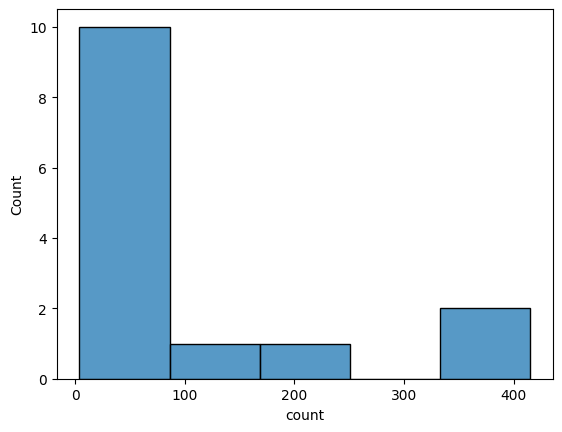

In [ ]:
#Plots histogram of the number of weekend orders,from highest to lowest,for each cuisine type
sns.histplot(df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().sort_values(), kde=False)
plt.show()

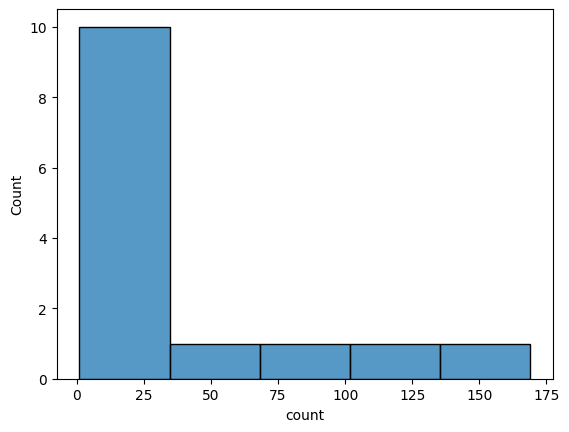

In [ ]:
#Plots histogram of the number of weekday orders,from highest to lowest,for each cuisine type
sns.histplot(df[df['day_of_the_week'] == 'Weekday']['cuisine_type'].value_counts().sort_values(), kde=False)
plt.show()

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The increased weekend order volumes are putting a strain on the available driver resources, resulting in a 26% increase in delivery times. The concentration of high ratings suggests that only very satisfied customers rate, while 38% of data is lost in unrated orders, raising questions about potential rating bias. Order costs exhibit a bimodal distribution, peaking at $13 and $25. Cuisine popularity remains consistent across weekdays, with heightened demand on weekends. Preparation time is relatively consistent, while delivery time significantly impacts total preparation time. A tie among four customers for fifth place under the proposed reward criteria necessitates further analysis or decision-making.

### Recommendations:

*Improve customer response ratings by incentivizing feedback and understanding why some customers don't rate their orders. Analyze demographics to reveal market segments. Focus marketing on weekdays to boost sales. Review delivery times to enhance service and consider weekday traffic's impact. Establish a tie-breaker for promotional offers, weighing financial implications and customer distinctions.






---